In [54]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import MinMaxScaler
import sklearn

In [55]:
# Import raw data
sample_submission = pd.read_csv("~/Desktop/caltech/sample_submission.csv")
test_df = pd.read_csv("~/Desktop/caltech/test.csv")
train_df = pd.read_csv("~/Desktop/caltech/train.csv")

In [56]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()

#clean_test = test_df.dropna()
clean_test = test_df.drop(['id'],axis=1)
#clean_test.interpolate()
clean_test = imputer.fit_transform(clean_test)

#clean_train = train_df.dropna()
clean_train = train_df.drop(["id"],axis=1)
#clean_train.interpolate()
clean_train = imputer.fit_transform(clean_train)

train_arr = np.array(clean_train)
test_arr = np.array(clean_test)
# try linear interpolation instead

X_trn, Y_trn = train_arr[:,:26], train_arr[:,-1]

print("Len X_trn: ", len(X_trn))
print("Len Y_trn: ", len(Y_trn))

Len X_trn:  592380
Len Y_trn:  592380


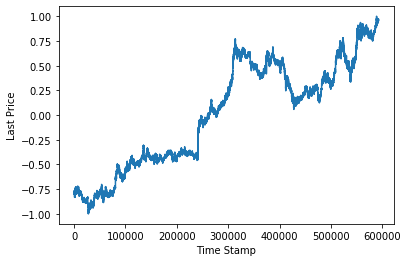

In [57]:
# Normalize data

#id = train_df.drop(columns=['id'])
scaler = MinMaxScaler(feature_range=(-1, 1))
scaler.fit(train_df)
train_df[['last_price','mid']] = scaler.fit_transform(train_df[['last_price','mid']])

# Show normalized data
plt.figure()
plt.plot(train_df['id'],train_df['last_price'])
plt.xlabel('Time Stamp')
plt.ylabel('Last Price')
plt.show()

In [77]:

def ridge(x, y):
    # run ridge and return weights
    clf = Ridge()
    clf.fit(x,y)
    #predicted = clf.predict_(x)
    d = clf.predict(x)
    probs = np.exp(d) / np.sum(np.exp(d))
    return clf, probs

clf_ridge, p_ridge = ridge(X_trn, Y_trn)

In [78]:
print((p_ridge))

[5.55005320e-06 2.32886588e-06 2.98766181e-06 ... 1.42345352e-06
 1.42345352e-06 1.42345352e-06]


In [79]:
import sklearn
sklearn.metrics.roc_auc_score(np.reshape(Y_trn,(len(X_trn),)),
                             np.reshape(clf_ridge.predict(X_trn),(len(X_trn,))),)
# training score normalized = .6441120173493247

0.6441120173493247

In [86]:
#X_tst, Y_tst = test_arr[:,:26], test_arr[:,-1]
X_tst = test_arr[:,:26]

fin_prediction = clf_ridge.predict(test_arr)
fin_probs = np.exp(fin_prediction) / np.sum(np.exp(fin_prediction))
print(fin_probs)

[5.80384343e-06 4.96100917e-06 4.45760108e-06 ... 5.47318090e-06
 4.95422566e-06 4.07522337e-06]


In [82]:
clean_sub = sample_submission.drop(['Predicted'],axis=1)

In [87]:
clean_sub['Predicted'] = fin_probs

In [88]:
clean_sub

,id,Predicted
0,592380,0.000006
1,592381,0.000005
2,592382,0.000004
3,592383,0.000005
4,592384,0.000007
...,...,...
191854,784234,0.000005
191855,784235,0.000004
191856,784236,0.000005
191857,784237,0.000005


In [89]:
#np.savetxt('RR.csv',clean_sub,delimiter=',')
clean_sub.to_csv('submission4.csv', sep=',', index=False, header=1)